<a href="https://colab.research.google.com/github/viky18096/Machine_learning/blob/main/Classifying_Heart_Diseases_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving heart_disease.csv to heart_disease.csv


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:

# Load in the heart disease dataset
heart = pd.read_csv("heart_disease.csv")


**Exploring The Dataset**

In [ ]:
heart.shape

(303, 15)

In [ ]:
heart.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

In [ ]:
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


The first column is an index. it can be dropped. The present column is our binary outcome of interest. 0 encodes the absence of any heart disease, while 1 encodes the presence.

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [ ]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for cat in categorical:
    print(f'For the {cat} variable the unique values are:{np.sort(heart[cat].unique())}')

For the sex variable the unique values are:[0 1]
For the cp variable the unique values are:[1 2 3 4]
For the fbs variable the unique values are:[0 1]
For the restecg variable the unique values are:[0 1 2]
For the exang variable the unique values are:[0 1]
For the slope variable the unique values are:[1 2 3]
For the ca variable the unique values are:['0.0' '1.0' '2.0' '3.0' '?']
For the thal variable the unique values are:['3.0' '6.0' '7.0' '?']


There are no null values. 'ca' and 'thal' data are formated as strings

<Axes: >

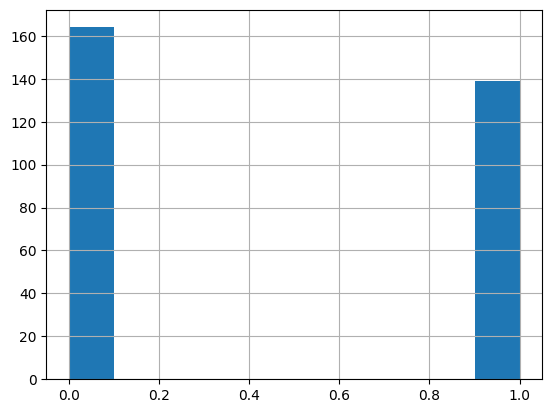

In [ ]:
heart['present'].hist()

There's almost an equal number of cases and non-cases in the dataset.

In [ ]:
heart['thal'].value_counts()['?']

2

In [ ]:
heart=heart[heart['thal']!='?']
print('?' in heart['thal'].unique())

False


In [ ]:
heart['ca'].value_counts()['?']

4

In [ ]:
heart=heart[heart['ca']!='?']
print('?' in heart['ca'].unique())

False


# **Exploratory data analysis:**

**Examining categorical variables and their relationship to target variable**

In [ ]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for cat in categorical:
    print(f'For the {cat} variable the unique values are:{np.sort(heart[cat].unique())}')

For the sex variable the unique values are:[0 1]
For the cp variable the unique values are:[1 2 3 4]
For the fbs variable the unique values are:[0 1]
For the restecg variable the unique values are:[0 1 2]
For the exang variable the unique values are:[0 1]
For the slope variable the unique values are:[1 2 3]
For the ca variable the unique values are:['0.0' '1.0' '2.0' '3.0']
For the thal variable the unique values are:['3.0' '6.0' '7.0']


<Axes: xlabel='exang', ylabel='count'>

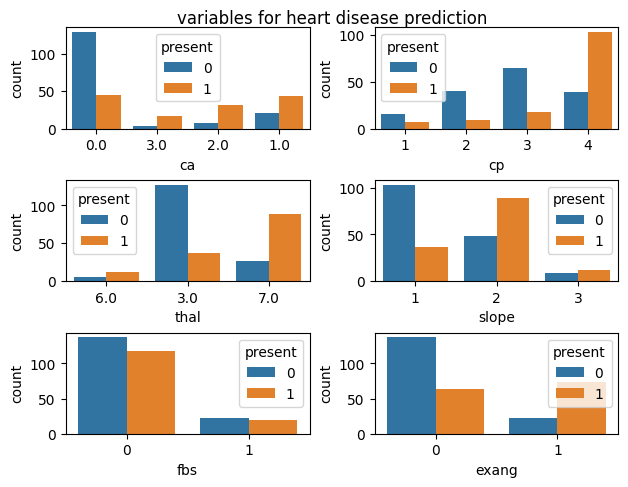

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 2)
fig.tight_layout(pad=1.6)
fig.suptitle('variables for heart disease prediction')
sns.countplot(ax=axes[0,0],data=heart, x='ca', hue='present')
sns.countplot(ax=axes[0,1],data=heart, x='cp', hue='present')
sns.countplot(ax=axes[1,0],data=heart, x='thal', hue='present')
sns.countplot(ax=axes[1,1],data=heart, x='slope', hue='present')
sns.countplot(ax=axes[2,0],data=heart, x='fbs', hue='present')
sns.countplot(ax=axes[2,1],data=heart, x='exang', hue='present')

<Axes: xlabel='present', ylabel='thalach'>

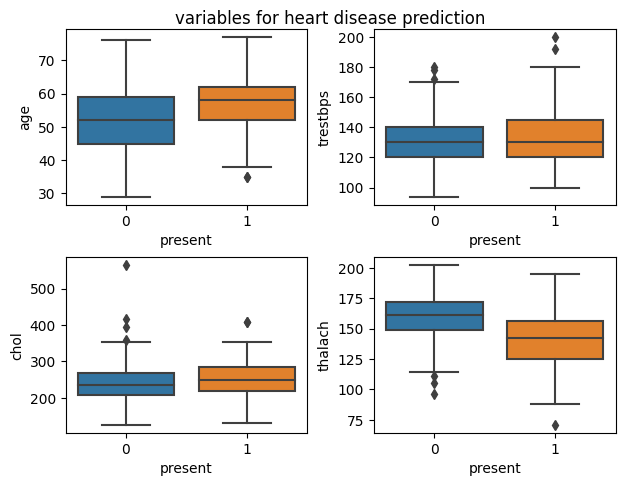

In [ ]:
fig, axes = plt.subplots(2, 2)
fig.tight_layout(pad=1.7)
fig.suptitle('variables for heart disease prediction')
sns.boxplot(ax=axes[0,0],data=heart, x='present', y='age')
sns.boxplot(ax=axes[0,1],data=heart, x='present', y='trestbps')
sns.boxplot(ax=axes[1,0],data=heart, x='present', y='chol')
sns.boxplot(ax=axes[1,1],data=heart, x='present', y='thalach')


In [ ]:
heart['ca'] = heart['ca'].astype(float)
heart['thal'] = heart['thal'].astype(float)


In [ ]:
#Data types of each column
data_types = heart.dtypes
print("Data types of each column:", data_types)


Data types of each column: Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca            float64
thal          float64
present         int64
dtype: object


In [ ]:
# Checking potential predictors
heart.groupby("present").agg(
    {
        "age": "mean",
        "sex": "mean",
        "cp": "mean",
        "trestbps": "mean",
        "chol": "mean",
        "fbs": "mean",
        "restecg": "mean",
        "thalach": "mean",
        "exang": "mean",
        "oldpeak": "mean",
        "slope": "mean",
        "ca": "mean",
        "thal": "mean"
    }
)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
present,,,,,,,,,,,,,
0,52.643750,0.556250,2.793750,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,1.412500,0.275000,3.787500
1,56.759124,0.817518,3.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,1.824818,1.145985,5.832117


Some columns have a small, but noticeable difference when stratified by predictors. Based on the differences and some knowledge about heart disease, these seem like good candidates for predictors:

1. age
2. thalach (maximum heart rate achieved)
3. restecg (resting ECG)
4. ca (number of vessels colored by fluoroscopy)

In [ ]:
from scipy.stats import pearsonr


**Building The Model**

In [ ]:
X = heart[["age", "thalach", "restecg", "ca"]]
y = heart["present"]

# 70% for training set, 30% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
# Checking for separation in the datasets
print("Y_train: ", sum(y_train == 0))
print("Y_train: ", sum(y_train == 1))
print("Y_test: ", sum(y_test == 0))
print("Y_test: ", sum(y_test == 1))

We confirm above that there are both cases and non-cases in both the training and test sets

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
# Checking the various metrics for the model
acc = model.score(X_train, y_train)

predictions = model.predict(X_train)
tp = sum((predictions == 1) & (y_train == 1))
fp = sum((predictions == 1) & (y_train == 0))
tn = sum((predictions == 0) & (y_train == 0))
fn = sum((predictions == 0) & (y_train == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Training Accuracy: ", acc)
print("Training Sensitivity: ", sens)
print("Training Specificity: ", spec)

Overall the training accuracy was about 76%, the sensitivity was 66%, and the specificity was 86%. Based on these metrics, the model seems to perform better for non-cases.

**Interpreting The Model Coefficients**

In [ ]:

coefs = ["age", "thalach", "restecg", "ca"]

# Checking in terms of log-odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(val, 2))


In [ ]:

# Checking in terms of odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(np.exp(val), 2))



*   Higher age and maximum heart rate (thalach) is associated with lower odds of heart disease holding the other predictors constant, but both of these odds ratios are close to 1.
*   Resting ECG and the number of colored vessels are associated with higher odds of heart disease holding the other predictors constant. These increases seem to be moderate and high, respectively (a 47% increase and 225% (!) increase).

**Final Model Evaluation**

In [ ]:
# Checking the various metrics for the model (test set)
acc = model.score(X_test, y_test)

predictions = model.predict(X_test)
tp = sum((predictions == 1) & (y_test == 1))
fp = sum((predictions == 1) & (y_test == 0))
tn = sum((predictions == 0) & (y_test == 0))
fn = sum((predictions == 0) & (y_test == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Test Accuracy: ", acc)
print("Test Sensitivity: ", sens)
print("Test Specificity: ", spec)


NameError: ignored

**Drawing Conclusions**

Test accuracy was 75%, sensitivity was 79%, and specificity was 72%. Compared to the training set, the accuracy didn't change much, while the model fared better with cases and worse with non-cases. This is potentially useful since this application is health-based. We might be more interested in being better at identifying cases than non-cases.